# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #5


*   Youtube Lecture #17-22
*   Written by Seungeun Lee

## 1. Batch Normalization




*    Reference. https://huangdi.tistory.com/m/9, https://wegonnamakeit.tistory.com/m/47, https://wikidocs.net/195419
*    For https://huangdi.tistory.com/m/9, try to understand the need for Batch Normalization. (The code is not running properly due to the github issues)

In [ ]:
 # DO NOT run this code!!
# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)

relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32) # Batch Normalization for 1D data
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True) nn_linear3 = torch.nn.Linear(32, 10, bias=True)


# model
# torch.nn.Seqeuntial is kind of a "stack" operation of layers
# We usually apply ReLU after the BN, but it's not a must!
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                              linear2, bn2, relu,
                              linear3).to(device)
# Model w.o. BN
# Linear + ReLU is a convention
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

In [9]:
# If not using torch.nn.Sequential, you can use class module!

import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # in __init__, initialize the layers you'd like to use
        self.fc1 = nn.Linear(100, 50)
        self.bn = nn.BatchNorm1d(num_features=50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # in forward, place the layers sequentially
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [10]:
# BN 1D
m = nn.BatchNorm1d(100)
input = torch.randn(20, 100)
output = m(input)

# BN 2D
# So far, we've only used BN 1D
# But what's BN 2D??
m = nn.BatchNorm2d(100)
input = torch.randn(20, 100, 35, 45)
output = m(input)

### Question 1. Compare & Contrast BatchNorm1d and Batchnorm2d
*     Hint: https://gaussian37.github.io/dl-concept-batchnorm/, https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html, and https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

In [ ]:
# Batch normalization 1D
# It is used for 2D, 3D Input
# It actually means 1D Data + Batch number + Extra = 2D or 3D


In [ ]:
# Batch normalization 2D
# It is used for 4D Input
# It actually means 2D Data + Batch number + Extra = 4D

## 2. Weight Initialization

*   Reference. https://ysg2997.tistory.com/14, https://m.blog.naver.com/PostView.naver?blogId=tinz6461&logNo=221599717016&proxyReferer=

In [2]:
import torch
import torch.nn as nn
import torch.nn.init as init

In [ ]:
# Quick Question
# Read the document above and write a line-by-line
# explanation of the code below.

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(       # This process shows bottleneck effect of CNN
            nn.Conv2d(1,16,3,padding=1),  # 28 x 28 / Input channel 1, Output channel 16, Kernal 3x3
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1), # 28 x 28 / Input channel 16, Output channel 32, Kernal 3x3
            nn.ReLU(),
            nn.MaxPool2d(2,2),            # 14 x 14 / Max pooling with 2x2 kernal thus size becomes half.
            nn.Conv2d(32,64,3,padding=1), # 14 x 14 / Input channel 32, Output channel 64, Kernal 3x3
            nn.ReLU(),
            nn.MaxPool2d(2,2)             #  7 x 7 / Max pooling with 2x2 kernal thus size becomes half.
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(64*7*7,100), # Input size 64*7*7, Output size 100
            nn.ReLU(),
            nn.Linear(100,10) # Input size 100, Output size 10 (10 classes)
        )

        if isinstance(m, nn.Conv2d):
            init.kaiming_normal_(m.weight.data)
            m.bias.data.fill_(0)
        elif isinstance(m, nn.Linear):
            init.kaiming_normal_(m.weight.data)
            m.bias.data.fill_(0)
        # Weight = Kaiming (He) Initialization
        # Bias = All zero initialization

    def forward(self,x):
        out = self.layer(x)   # Pass input x -> Layers
        out = out.view(batch_size,-1)   # Flattening 2D Image
        out = self.fc_layer(out)    # Pass it to FC layer for classification
        return out

In [ ]:
# Then let's look at the efficiency of such Weight Init. techniques
# with visualization

In [ ]:
# Quick Question
# Read the document above and briefly explain the code below.

# 각각 다른 4종류의 Initialization을 테스트 해보는 코드들입니다

In [1]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
    return np.maximum(0, x)

# tanh
def tanh(x):
    return np.tanh(x)

# Weight matrix를 randn 함수로 생성
def weight_init(method=None):
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1 # Just Gaussian
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01 # Scaling with 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init

    return w

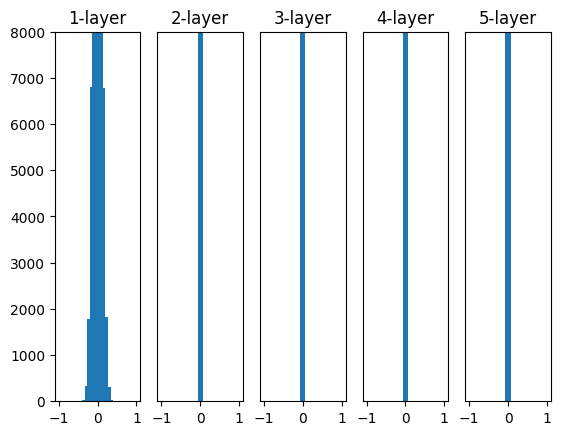

In [4]:
input_data = np.random.randn(1000, 100) # 1000x100 random matrix
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 8000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

# Layer가 늘어갈수록 tanh값이 0으로만 집중된다
# Weight이 너무 작은 값들로만 구성되어서 생기는 것으로 보임

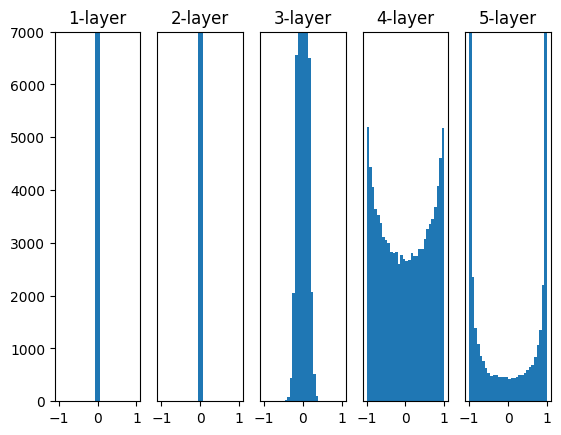

In [5]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

# Layer가 늘어갈수록 tanh값이 양극단으로만 치우침
# Weight이 너무 큰 값들로만 구성되어서 생기는 것으로 보임

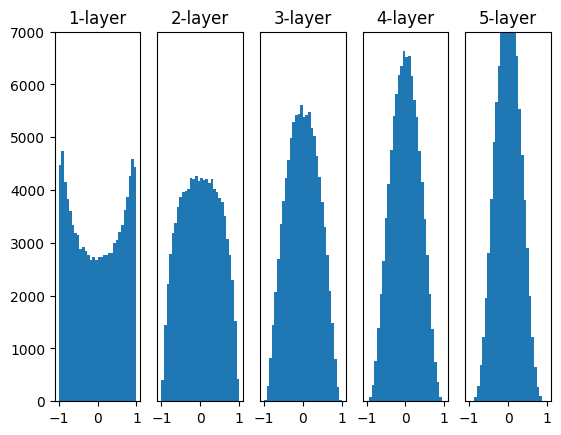

In [6]:
# Xavier Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

# Layer가 늘어갈수록 tanh값이 0으로 조금씩 집중된다
# 그래도 앞선 Activation들에 비해서는 훨씬 고른 모습을 보인다

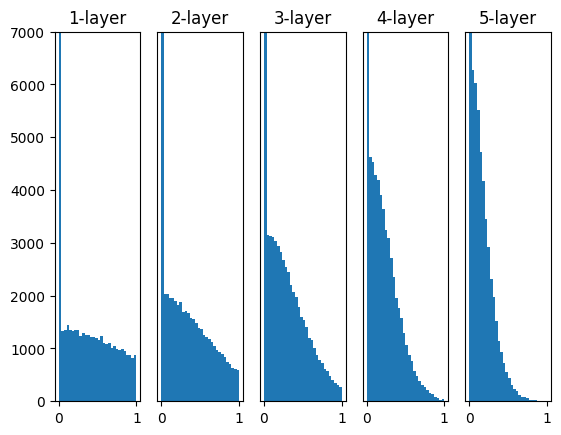

In [10]:
# He Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# Layer가 늘어갈수록 tanh값이 0으로 조금씩 집중된다
# 그래도 앞선 Activation들에 비해서는 훨씬 고른 모습을 보인다

## 3. CNN
*     Reference. https://justkode.kr/deep-learning/pytorch-cnn/

In [ ]:
## GPU (Optional)
# 런타임 - 런타임 유형 변경 - T4 GPU
# !nvidia-smi

In [ ]:
# Question
# Run two cells below and try to explain the
# change of tensor size after passing through the layers
# e.g.) Conv1: [10, 1, 20, 20] -> [10, 3, 16, 16], because --

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1) # Layer 1) 5x5 Kernal, Channel은 1->3
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1) # Layer 2) 5x5 Kernal, Channel은 3->10
    self.fc1 = nn.Linear(10 * 12 * 12, 50) # FC Layer 1) 1440->50
    self.fc2 = nn.Linear(50, 10)  # FC Layer 2) 50->10

  def forward(self, x): # Input x를 받아 CNN Layer로 Pass
    print("Before", x.size())
    x = F.relu(self.conv1(x)) # Layer 1 및 ReLU activation
    print("After conv1", x.size())
    x = F.relu(self.conv2(x)) # Layer 2 및 ReLU activation
    print("After conv2",x.size())
    x = x.view(-1, 10 * 12 * 12)  # Flatten
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x)) # Pass to FC Layer 1
    print("After fc1", x.size())
    x = self.fc2(x) # Pass to FC Layer 2
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

Before torch.Size([10, 1, 20, 20])
After conv1 torch.Size([10, 3, 16, 16])
After conv2 torch.Size([10, 10, 12, 12])
After dimension reduction torch.Size([10, 1440])
After fc1 torch.Size([10, 50])
After fc2 torch.Size([10, 10])


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.max_pool1 = nn.MaxPool2d(kernel_size=2)  # Max pooling by 2x2
    self.max_pool2 = nn.MaxPool2d(kernel_size=2)  # Max pooling by 2x2
    self.fc1 = nn.Linear(10 * 5 * 5, 50)  # FC Layer 1) 250->50
    self.fc2 = nn.Linear(50, 10)  # FC Layer 2) 50->10

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.max_pool1(x)) # Max pooling by 2x2
    print("After max_pool1", x.size())
    x = F.relu(self.max_pool2(x)) # Max pooling by 2x2
    print("After max_pool2",x.size())
    x = x.view(-1, 10 * 5 * 5)  # Flatten
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x)) # Pass to FC Layer 1
    print("After fc1", x.size())
    x = self.fc2(x) # Pass to FC Layer 2
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))

Before torch.Size([10, 1, 20, 20])
After max_pool1 torch.Size([10, 1, 10, 10])
After max_pool2 torch.Size([10, 1, 5, 5])
After dimension reduction torch.Size([1, 250])
After fc1 torch.Size([1, 50])
After fc2 torch.Size([1, 10])


In [ ]:
# Now let's construct a CNN model

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [15]:
train_data = datasets.MNIST('./data/', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

test_data = datasets.MNIST('./data/', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16351742.38it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 480744.89it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3799218.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4763823.15it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [17]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1) # Layer 1) 5x5 Kernal, Channel은 1->20
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)  # Layer 2) 5x5 Kernal, Channel은 20->50
        self.fc1 = nn.Linear(4 * 4 * 50, 500) # FC Layer 1) 800->500
        self.fc2 = nn.Linear(500, 10) # FC Layer 2) 500->10

    def forward(self, x):
        x = F.relu(self.conv1(x)) # Layer 1 및 ReLU activation
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # pooling by 2x2
        x = F.relu(self.conv2(x)) # Layer 2 및 ReLU activation
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # pooling by 2x2

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x)) # FC Layer 1
        x = self.fc2(x) # FC Layer 2
        return x

In [18]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss() # Cross Entropy를 Loss function으로
optimizer = optim.SGD(cnn.parameters(), lr=0.01)  # SGD Optimizer를 사용, Learning rate=0.01

In [ ]:
cnn.train()
for epoch in range(10): # EPOCHS = 10으로 하여 학습
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.315459966659546
loss of 0 epoch, 100 index : 0.7182453870773315
loss of 0 epoch, 200 index : 0.5381419658660889
loss of 0 epoch, 300 index : 0.6289063096046448
loss of 0 epoch, 400 index : 0.5977337956428528
loss of 0 epoch, 500 index : 0.3400299847126007
loss of 0 epoch, 600 index : 0.31817588210105896
loss of 0 epoch, 700 index : 0.20676717162132263
loss of 0 epoch, 800 index : 0.322250634431839
loss of 0 epoch, 900 index : 0.14882226288318634
loss of 0 epoch, 1000 index : 0.1608288735151291
loss of 0 epoch, 1100 index : 0.3661695122718811
loss of 1 epoch, 0 index : 0.07376150786876678
loss of 1 epoch, 100 index : 0.08228641748428345
loss of 1 epoch, 200 index : 0.11147097498178482
loss of 1 epoch, 300 index : 0.17188020050525665
loss of 1 epoch, 400 index : 0.05861864984035492
loss of 1 epoch, 500 index : 0.0804305300116539
loss of 1 epoch, 600 index : 0.17206698656082153
loss of 1 epoch, 700 index : 0.061746206134557724
loss of 1 epoch, 800 index : 0.16

In [ ]:
# Quick Question
# Write an explanation of the code below (evaluation cell only!)

In [ ]:
cnn.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    output = cnn(data)
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1, keepdim=True)
    correct += pred.eq(target.view_as(pred)).sum().item()
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
# Question (optional)
# Try to adjust the hyperparameters (kernel size, # of conv layers, ...)
# and get better results than the baseline (default) model!!

# x.view를 사용해 FC Layer의 Input size에 맞게 Flatten하는 부분
# 1차원으로 펴는 것은 Input size와 상관없으니 이해가 되지만
# 4*4*50과 같은 차원으로 만드는 것은 Input에 따라 안 맞거나
# Input의 크기가 오히려 부족할 수도 있을 것 같은데 이 부분을 정확히 이해하지 못함

### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment5

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60